## 1) Usefuls Modules

In [28]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import math 

from itertools import groupby
from helpers import *
from helpers_marc import *
from plots import *
import scipy
import scipy.io
import numpy as np
import scipy.sparse as sp
import csv

%load_ext autoreload
%autoreload 2
print("done")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
done


## 2) Training of the SGD matrix factorization

In [2]:
### A) Load the data

# write here the path to the dataset
path_dataset = "../datasets/data_train.csv"

# load the data 
ratings = load_data(path_dataset)
print("data loaded")

number of items: 10000, number of users: 1000
data loaded


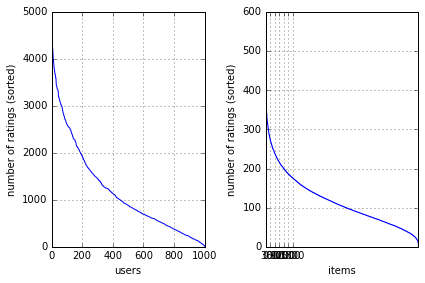

In [3]:
### B) Split the data

# First get the numbers of ratings per user and ratings per film 
# And plot these values

num_items_per_user, num_users_per_item = plot_raw_data(ratings)

In [4]:
# then select the items and users for which there are enough data
# and split the datan into a training set and a test set

# minimal number of data per user and per item
min_num_ratings = 10 

# fraction of the data set that will be the test set 
p_test = 0.1

valid_ratings, train, test = split_data(ratings, num_items_per_user, num_users_per_item, min_num_ratings, p_test)
# plot the resulting training and test set 
#plot_train_test_data(train, test)
print("data split : done")

Total number of nonzero elements in origial data:1176952
Total number of nonzero elements in train data:1059171
Total number of nonzero elements in test data:117702
data split : done


In [7]:
### C) Training : Find the best parameters for the sgd matrix factorization 
# (first : only best number of feature)

## Parameters for the matrix factorization
# maximum number of features fixed
max_K = 10
min_K= 2
# incrementation step for K
step_K = 2

# number of full iterations of the stochastic gradient descent
max_epochs = 20

# regularization parameters (regularization of the loss function in Gradient Descent)
#range_lambda_user = np.logspace(-3, 3, 7) 
#range_lambda_item = np.logspace(-3, 3, 7)
lambda_user = 1e-4
lambda_item = 1e-4 

# descent step size
gamma = 0.1

# initialization of variables refering to the matrix factorization for the best number
best_rmse_test_sgd = float('Inf')
best_k_sgd = 0
best_user_feat_sgd = np.zeros(1)
best_item_feat_sgd = np.zeros(1)

# for each K of the grid, compute the matrix factorization (training set) and the rmse (test set), 
# If it improves the results, update the rmse

for K in range(min_K,max_K,step_K):
    
    print("matrix factorization for the number of features : ", K)
    
    # compute the stochastic gradient descent matrix factorization
    user_features, item_features, rmse_test = matrix_factorization_SGD(train, test, K, max_epochs, lambda_user, lambda_item, gamma)
    if rmse_test < best_rmse_test_sgd:
        # better rmse => update the references
        best_rmse_test_sgd = rmse_test
        best_k_sgd = K
        best_user_feat_sgd = user_features
        best_item_feat_sgd = item_features

# print the results
print("best number of features found : ", best_k_sgd)
print("rmse on the test set for this number of features : ", best_rmse_test_sgd)

matrix factorization for the number of features :  5
learn the matrix factorization using SGD...
iter: 0, RMSE on training set: 1.5320247946734242.
iter: 1, RMSE on training set: 1.5164568938600178.
iter: 2, RMSE on training set: 1.5033419674315807.
iter: 3, RMSE on training set: 1.5072582606572795.
iter: 4, RMSE on training set: 1.4715464476841937.
iter: 5, RMSE on training set: 1.4429533148950113.
iter: 6, RMSE on training set: 1.4183105154461082.
iter: 7, RMSE on training set: 1.4213818085494032.
iter: 8, RMSE on training set: 1.3996201860823965.
iter: 9, RMSE on training set: 1.3666202450248082.
iter: 10, RMSE on training set: 1.366397923026868.
iter: 11, RMSE on training set: 1.333825961695989.
iter: 12, RMSE on training set: 1.3078139901549697.
iter: 13, RMSE on training set: 1.285598714269412.
iter: 14, RMSE on training set: 1.2407001561319757.
RMSE on test data: 1.2599428326165418.
best number of features found :  5
rmse on the test set for this number of features :  1.25994283

## 3) Prediction

In [8]:
## prediction using same parameters and the best number of features found previously

In [9]:
### A) Load the prediction data
path_evaluation = "../datasets/sampleSubmission.csv"
ratings_submit = load_data(path_evaluation)
evaluated_on = ratings_submit.toarray()
evaluated_on = evaluated_on.astype(np.int8)

number of items: 10000, number of users: 1000


In [ ]:
# compute the prediction matrix for the best k and all the ratings
# not only those for sufficient amount of data
#max_epochs = 15
data_sub = ratings
user_feat_sub, item_feat_sub, rmse_test = matrix_factorization_SGD(data_sub, data_sub, best_k_sgd, max_epochs, lambda_user, lambda_item, gamma)

prediction = np.dot(np.transpose(item_feat_sub), user_feat_sub)
print("prediction matrix computed")

learn the matrix factorization using SGD...


In [38]:
# compute the csv file to store the results

filename = "../results/submission_sgd.csv"

matrix2file(filename, prediction, evaluated_on)


Creating csv result file
